In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import Normalizer, normalize
from sklearn.naive_bayes import GaussianNB
from skimage.io import imread

In [2]:
tigers = r"C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\Image_1.jpg"

image = imread(r"tiger_data\train\tiger\Image_1.jpg")

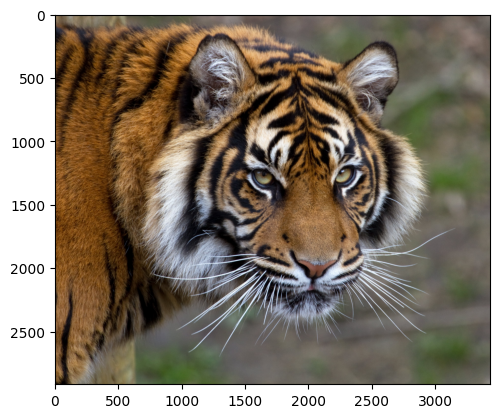

In [3]:
plt.imshow(image)

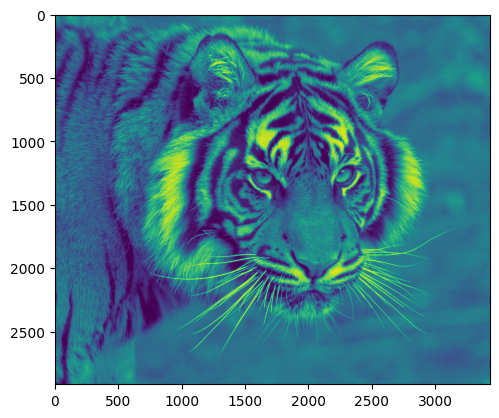

In [4]:
from skimage.color import rgb2gray
gray_img = rgb2gray(image)

plt.imshow(gray_img)

In [5]:
gray_img.shape

(2916, 3432)

In [6]:
from skimage.transform import resize

resized_img = resize(image, (28,28))

In [7]:
flat_img = resized_img.flatten()
flat_img.shape

(2352,)

In [9]:
input_dir = r"C:\Users\DELL\Desktop\my new project\tiger_data\train"
catg = ["not_tiger", "tiger"]

data = []
labels = []

for cat_indx, cat in enumerate(catg):
    for file in os.listdir(os.path.join(input_dir, cat)):
        img_path = os.path.join(input_dir, cat, file)
        print(img_path)
        img = imread(img_path) 
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(cat_indx)

C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (1).jpeg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (1).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (10).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (11).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (12).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (13).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (14).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (15).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (16).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (17).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (18).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (19).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train

FileNotFoundError: No such file: 'C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\Image_17.gif'

In [ ]:
data_list = data
labels_list = labels

In [ ]:
import numpy as np
for i, d in enumerate(data):
    print(f"Element {i} shape: {np.shape(d)}")

In [ ]:
del data[143]
del data[141]
del data[128]
del labels[143]
del labels[141]
del labels[128]

In [ ]:
import numpy as np
labels = np.asarray(labels)
data = np.asarray(data)

In [ ]:
plt.imshow(data[25].reshape(15,15,3))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, stratify = labels, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()

In [ ]:
naive.fit(X_train, y_train)

In [ ]:
naive.score(X_train, y_train)

In [ ]:
y_pred = naive.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import joblib
model = "tiger_classifier_2.pkl"
joblib.dump(naive, model)

In [ ]:
print("the end")